In [1]:
from lambeq import SpacyTokeniser
from lambeq import BobcatParser
from lambeq import AtomicType, IQPAnsatz

In [2]:
tokeniser = SpacyTokeniser()
sentence = "Sara buys the book from the bookshop"
tokens = tokeniser.tokenise_sentence(sentence)
tokens

['Sara', 'buys', 'the', 'book', 'from', 'the', 'bookshop']

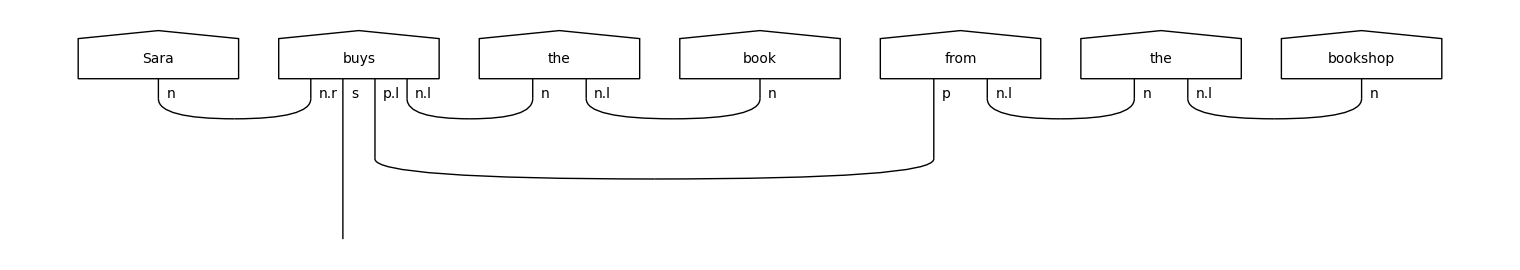

In [3]:
diagram = BobcatParser(verbose='suppress').sentence2diagram(tokens, tokenised=True)
diagram.draw(figsize=(15, 10))

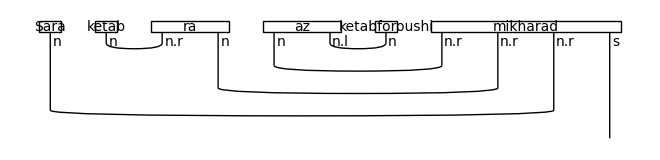

In [4]:
from lambeq.backend.drawing import draw
from lambeq.backend.grammar import Cap, Cup, Id, Ty, Word, Diagram


n, s = Ty('n'), Ty('s')

# Sara ketab ra az ketabforoushi mikharad
Sara = Word('Sara', n)
ketab = Word('ketab', n)
ra = Word('ra', n.r @ n)
az = Word('az', n @ n.l)
ketabforoushi = Word('ketabforoushi', n)
mikharad = Word('mikharad', n.r @ n.r @ n.r @ s )

persian_diagram = (Sara) >> (n @ ketab) >> (n @ n @ ra) >> (n @ n @ n.r @ n @ az) >> (n @ n @ n.r @ n @ n @ n.l @ ketabforoushi) >> (n @ n @ n.r @ n @ n @ n.l @ n @ mikharad) >> (n @ n @ n.r @ n @ n @ Cup(n.l, n) @ n.r @ n.r @ n.r @ s) >> (n @ n @ n.r @ n @ Cup(n, n.r) @ n.r @ n.r @ s) >> (n @ n @ n.r @ Cup(n, n.r) @ n.r @ s) >> (n @ Cup(n, n.r) @ n.r @ s) >> (Cup(n, n.r) @ s)
draw(persian_diagram)

In [5]:
from pytket.extensions.qiskit import tk_to_qiskit
import matplotlib as mpl

In [6]:
ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.PREPOSITIONAL_PHRASE: 1, AtomicType.SENTENCE: 1}, n_layers = 2)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


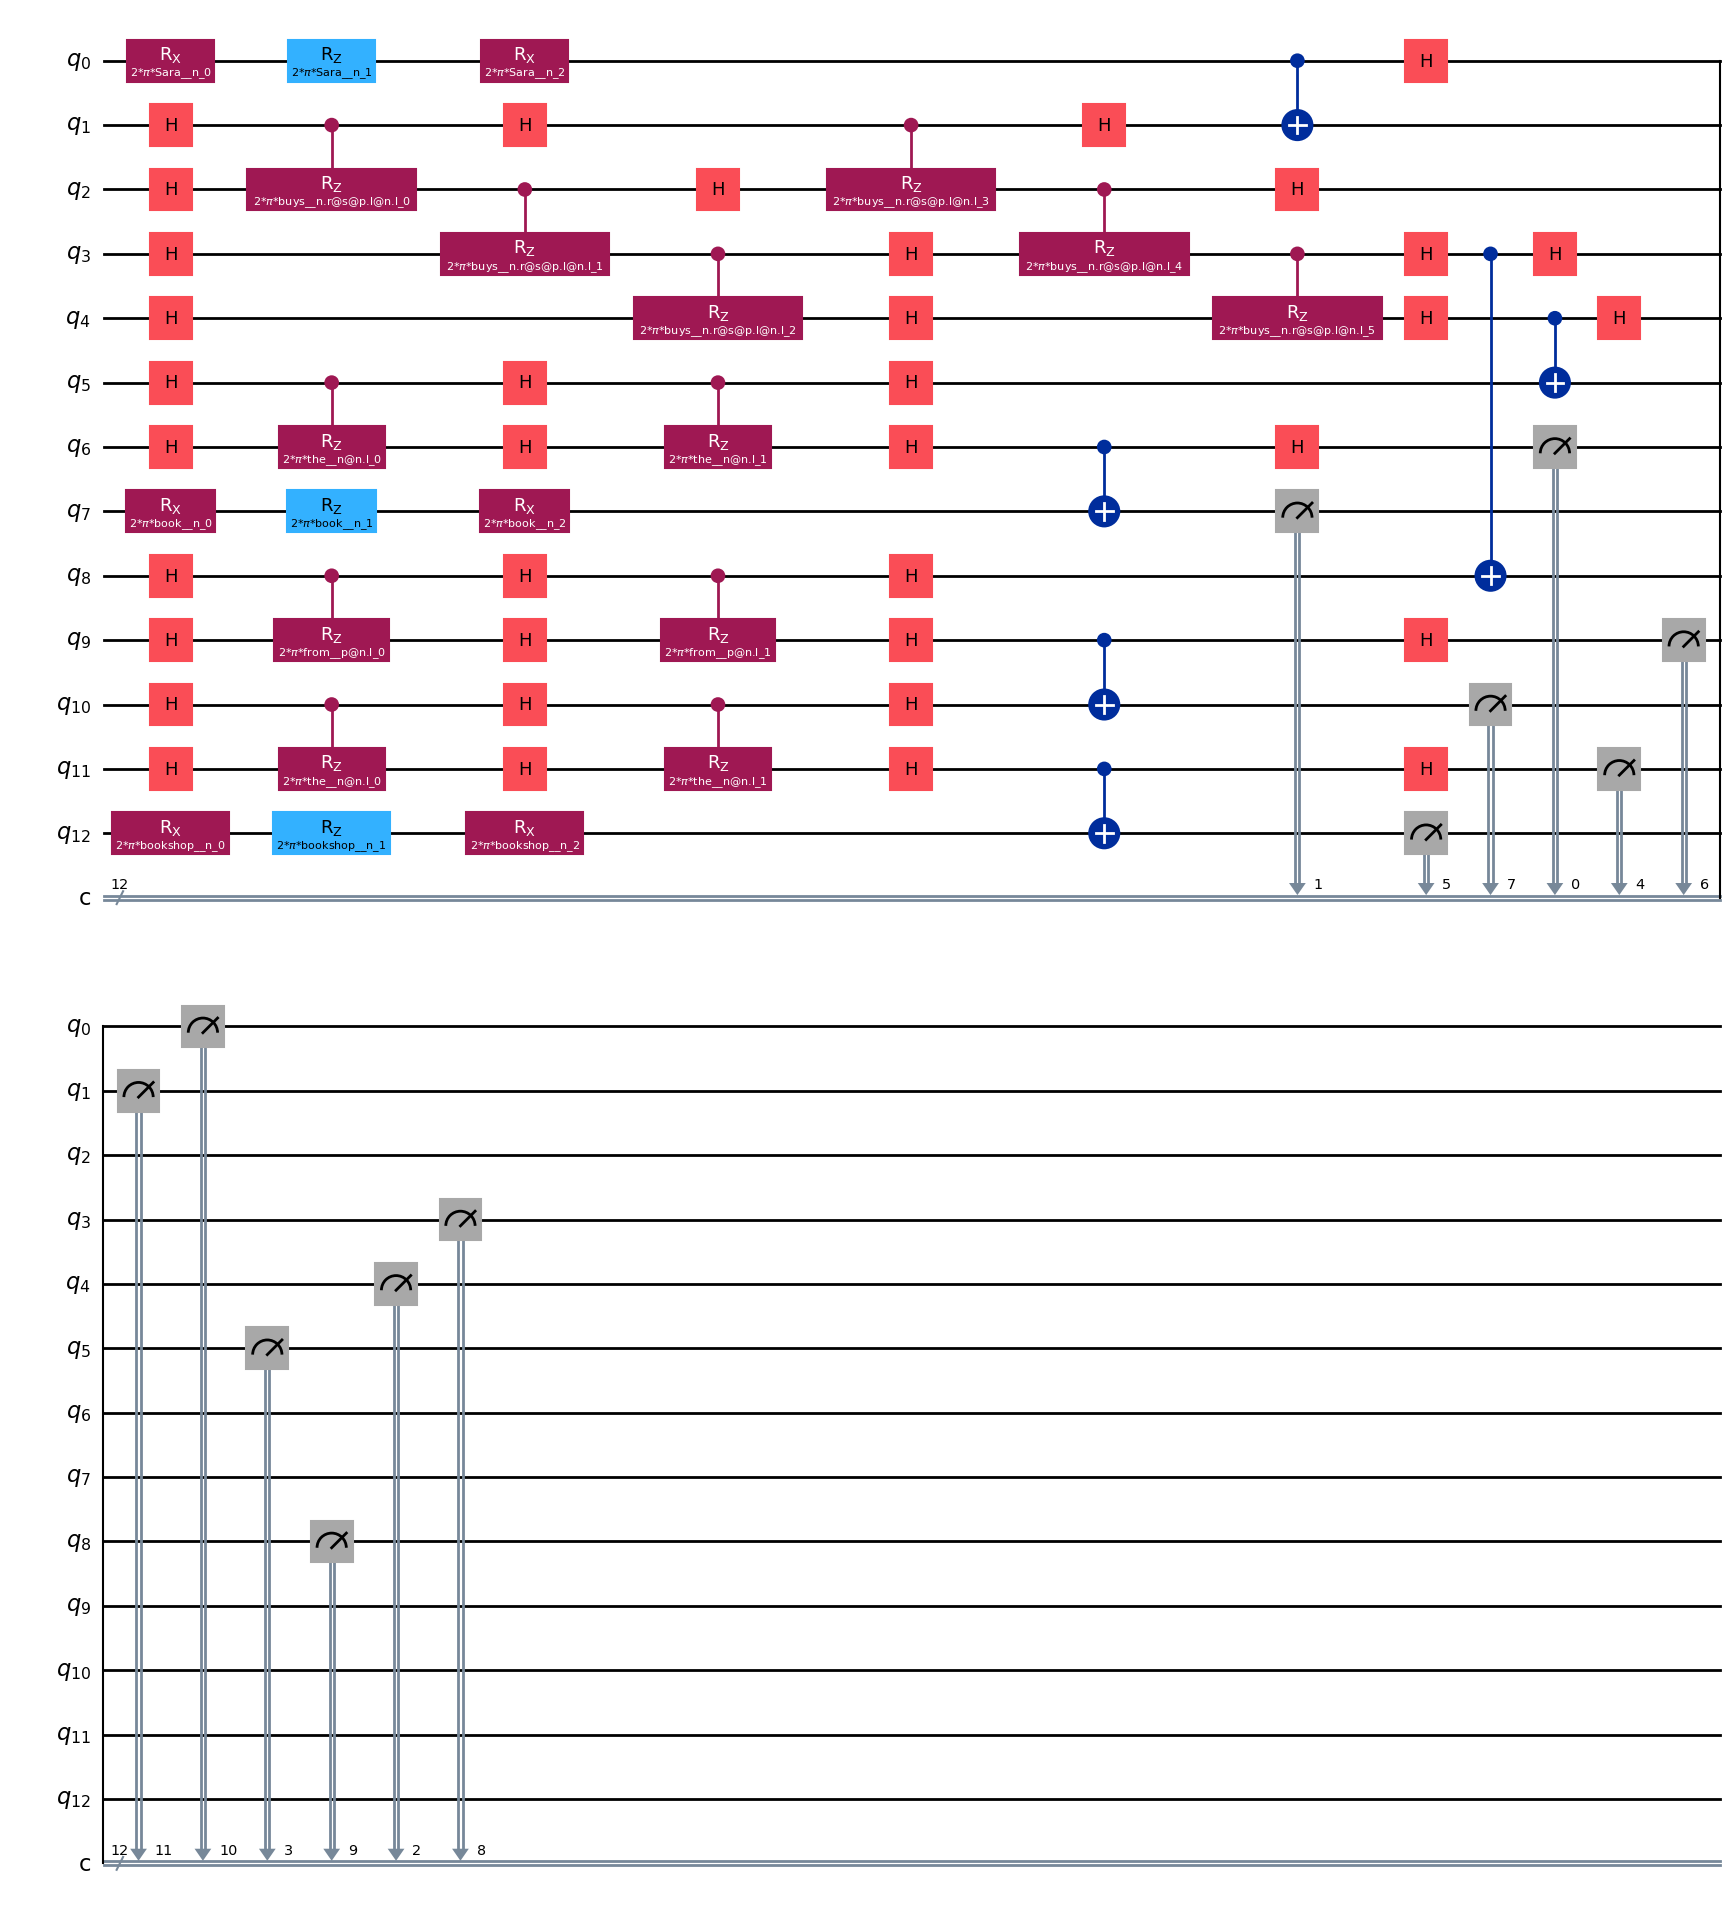

In [7]:
# Convert string diagram into quantum circuit
circuit = ansatz(diagram)
qiskit_circuit = tk_to_qiskit(circuit.to_tk())
qiskit_circuit.draw(output="mpl")

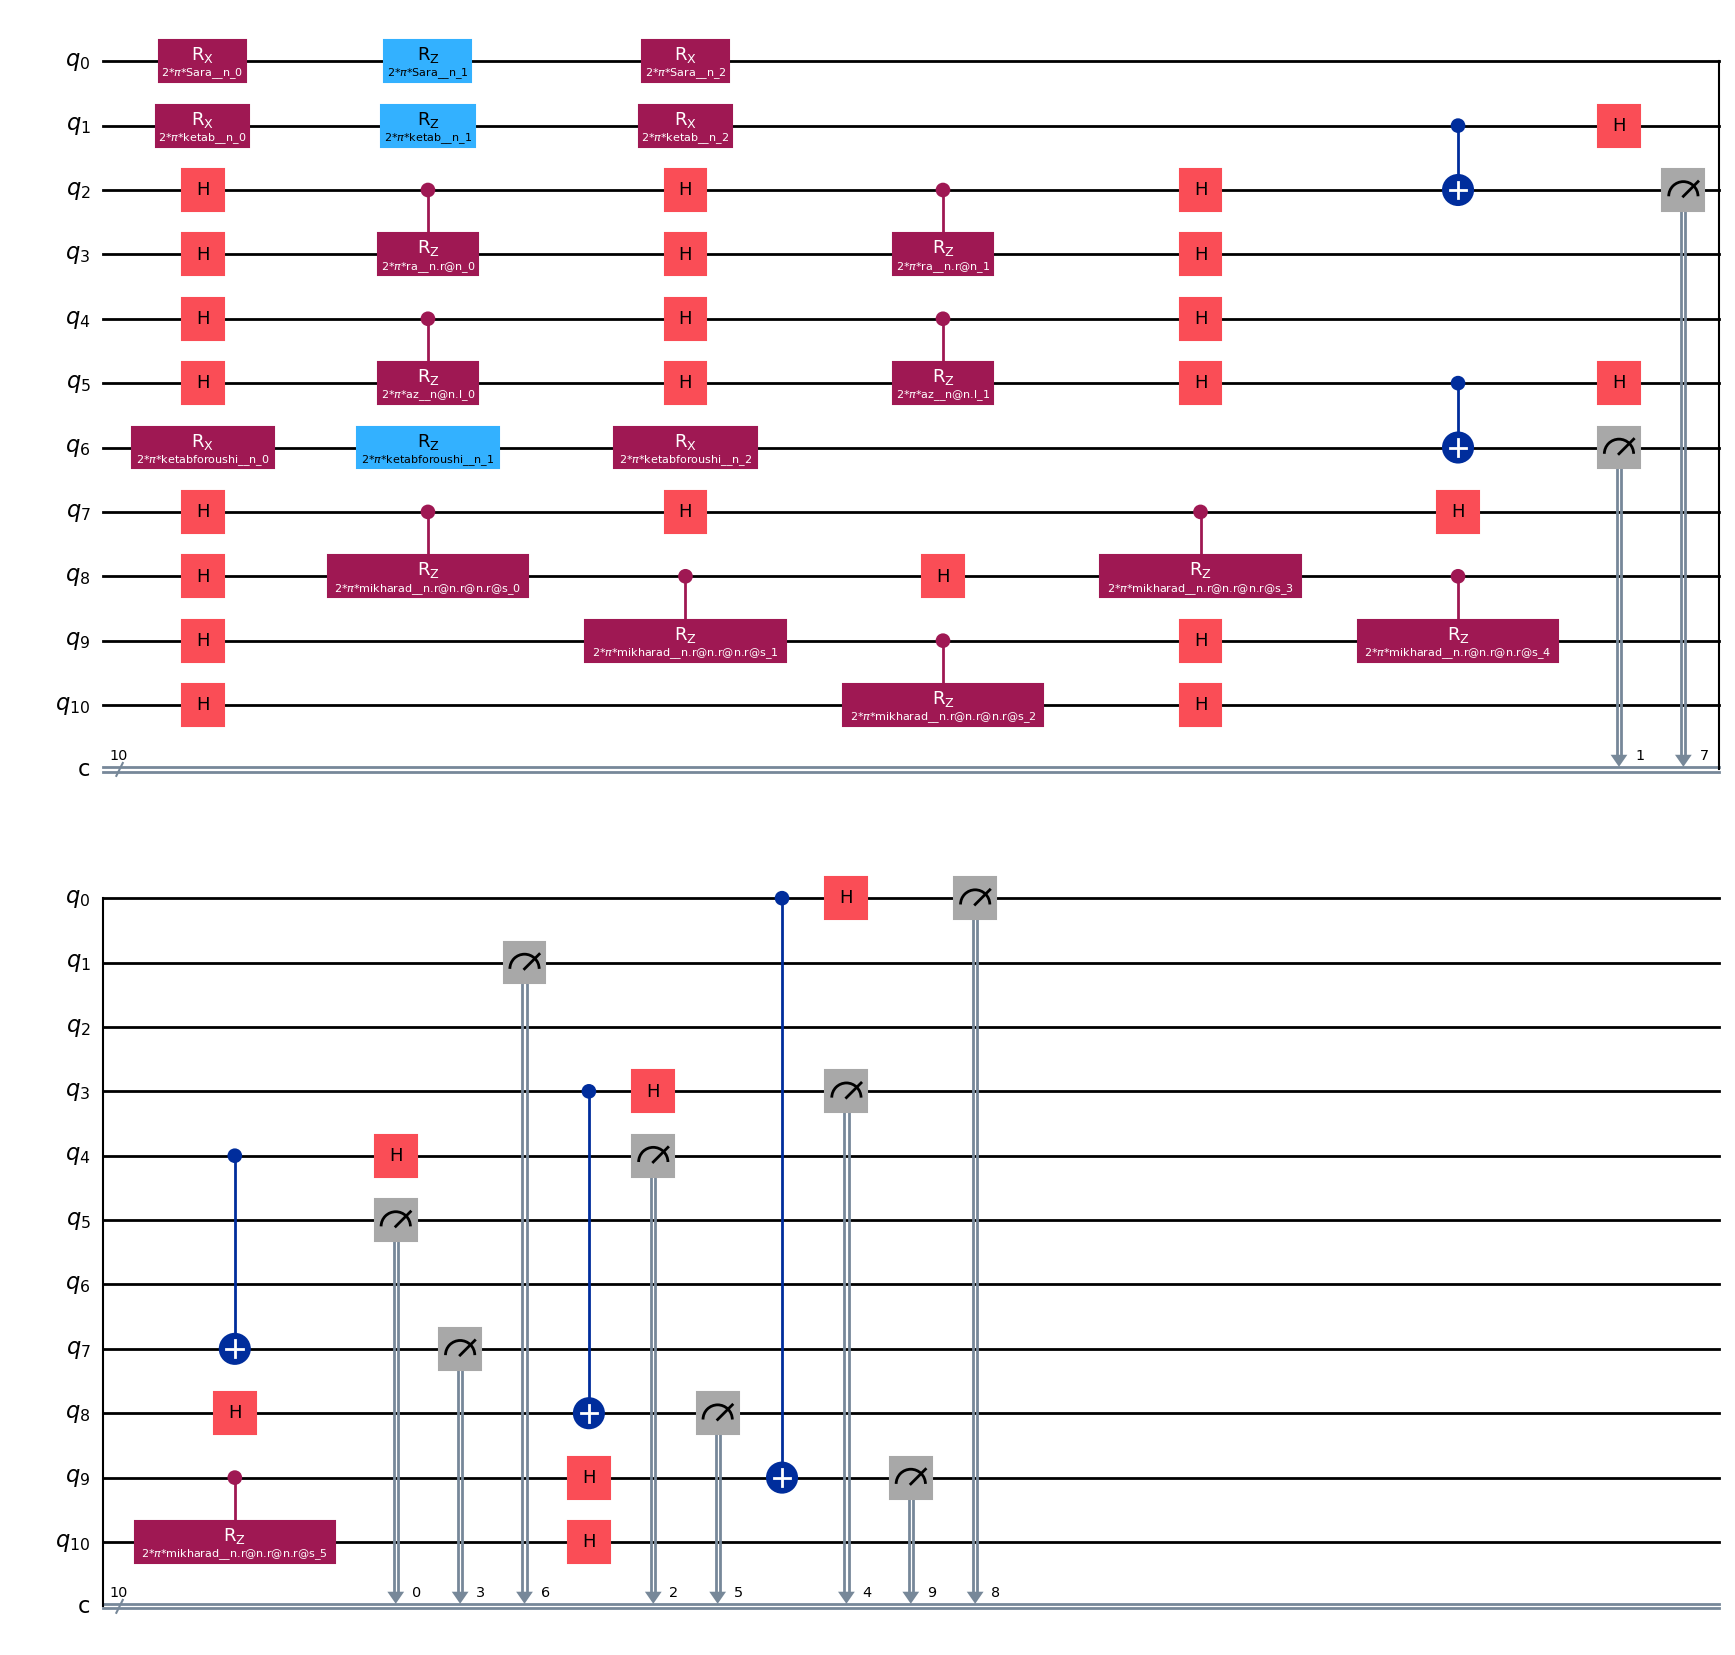

In [8]:
# Persian quanutm circuit
persian_circuit = ansatz(persian_diagram)
persian_qiskit_circuit = tk_to_qiskit(persian_circuit.to_tk())
persian_qiskit_circuit.draw(output="mpl")